# Altair: Declarative Visualization in Python

This is a quick tutorial on [Altair](altair-viz.github.io), a powerful visualization tool in python. 

## Installation
Here I present a quick installation procedure of Altair. For more details/options see [here](https://altair-viz.github.io/getting_started/installation.html#installation). 

**Note**: While you can use Altair with Jupyter notebook, it is recommended to use Altair with Jupyterlab, a perfect (and way more powerful) alternative to Jupyter notebooks.

**Quick install**:
pip install altair vega_datasets jupyterlab

Then from terminal type in: **jupyter lab**

**Note**: **if** you prefer using jupyter **notebook** then you need to install the package vega, and also include ```alt.renderers.enable('notebook')```after you import altair

### Quick Example

In [1]:
import altair as alt

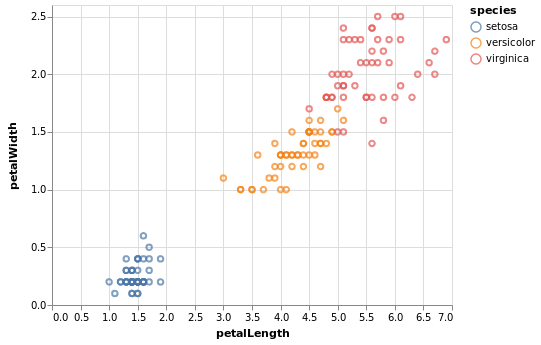

In [2]:
from vega_datasets import data
iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
).interactive() # by adding the .interactive() method, you can zoom in/out 

### Pandas dataframe visualization with Altair

In [3]:
import pandas as pd

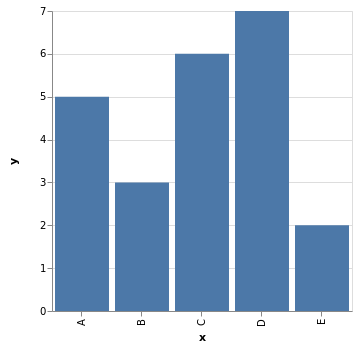

In [4]:
costum_data = pd.DataFrame({'x' : ['A', 'B', 'C', 'D', 'E'], 'y' : [5, 3, 6, 7, 2]})
alt.Chart(costum_data).mark_bar().encode(
    x = 'x',
    y = 'y',
).properties(
    height = 300,
    width = 300
)

Note that you can also save the image as SVG or PNG (In my version, I should hover on the dots on the top right to see the options).

In [5]:
import numpy as np

In [6]:
rand = np.random.RandomState(0)
data = pd.DataFrame({'value' : rand.randn(100).cumsum()}, index = pd.date_range('2018', freq = 'D', periods = 100))
data.head()

value
2018-01-01  1.764052
2018-01-02  2.164210
2018-01-03  3.142948
2018-01-04  5.383841
2018-01-05  7.251399

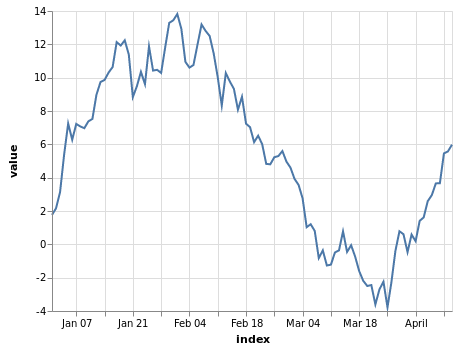

In [7]:
alt.Chart(data.reset_index()).mark_line().encode(
    x = 'index:T',
    y = 'value:Q'
)

In [8]:
from vega_datasets import data

In [9]:
cars = data.cars()

In [10]:
cars.head(3)

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01

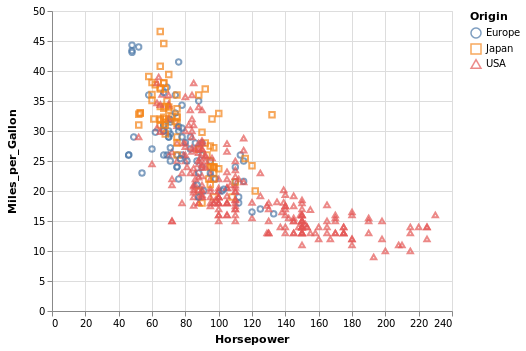

In [11]:
alt.Chart(cars).mark_point().encode(
    x = 'Horsepower', 
    y = 'Miles_per_Gallon',
    color = 'Origin', 
    shape = 'Origin'
)

### Histogram

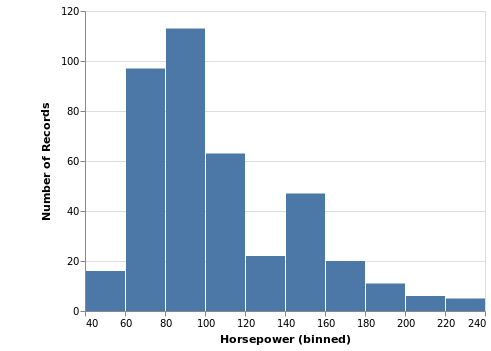

In [12]:
alt.Chart(cars).mark_bar().encode(
    alt.X('Horsepower', bin = True),
    y = 'count()'
)

### Two Dimensional Histogram

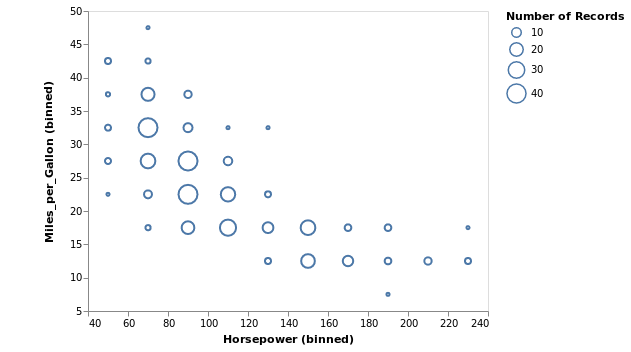

In [13]:
alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower', bin = True),
    alt.Y('Miles_per_Gallon', bin = True),
    size = 'count()'
)

### Three Dimensional Histogram
You can even present the histogram of three quantities:

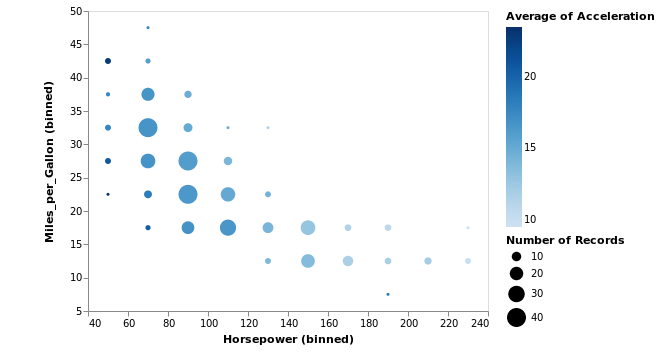

In [14]:
alt.Chart(cars).mark_circle().encode(
    alt.X('Horsepower', bin = True),
    alt.Y('Miles_per_Gallon', bin = True), 
    size = 'count()',
    color = 'average(Acceleration)'
)

### Selection interval
This is one of the coolest features of Altair. Click on the left chart and drag to create a selection rectangle. Then move the rectangle around and see how the right chart follows. This feature could be very usefull for Explatory Data Analysis (EDA). 

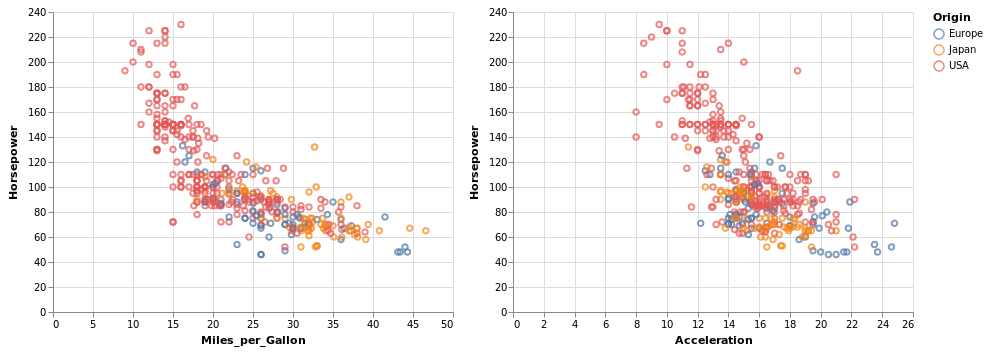

In [15]:
interval = alt.selection_interval(encodings=['x', 'y'])
chart = alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower', 
    color = alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection = interval
)
chart | chart.encode(x = 'Acceleration')

## Maps in Altair
Altair can plot Choropleth Maps and maps with layers. Here I show how you can plot a choropleth map. A choropleth map is partitioned to sub-shapes. A value is associated to each of these shapes. For instance, the average salary of each canton in Switzerland is the value associated to the sub-shapes (i.e. each canton). 

A geomap can be presented by a json file type, in which the properties of the map and sub-shapes are stored (e.g., id of each subshape and shape of it in the form of coordinates of a polygon). Below, we see how you can use a json map and integrate it with the associated values of subshapes in a pandas dataframe (the following code was first presented by @mattijn on [this](https://github.com/altair-viz/altair/issues/588) Altair issue.) 

In [16]:
import pandas as pd
import geopandas as gpd
import urllib
import json

In [17]:
# where to save the data (json, and values)
counties = r'./data/us-10m.json'
unemp_data = r'./data/unemployment.tsv' 

In [18]:
urllib.request.urlretrieve(data.us_10m.url, counties)
urllib.request.urlretrieve(data.unemployment.url, unemp_data)

('./data/unemployment.tsv', <http.client.HTTPMessage at 0x7f8989d2d4e0>)

In [19]:
df = pd.read_csv(unemp_data, sep='\t')
gdf = gpd.read_file(counties, driver='TopoJSON')
gdf.id = gdf.id.astype(int)

In [20]:
gdf.head()

id                                           geometry
0  22051                                                 ()
1  53000  POLYGON ((-122.6554402714815 48.41032005328384...
2  53073  (POLYGON ((-120.8536146368232 49.0001146177235...
3  30105  POLYGON ((-106.1123837970986 48.99904031068445...
4  30029  POLYGON ((-114.0698488011574 48.99904031068445...

In [21]:
gdf_merged = gdf.merge(df, left_on='id', right_on='id', how='inner')
gdf_merged.head()

id                                           geometry   rate
0  22051                                                 ()  0.065
1  22051  (POLYGON ((-90.1077214366575 30.19168413151698...  0.065
2  53073  (POLYGON ((-120.8536146368232 49.0001146177235...  0.078
3  30105  POLYGON ((-106.1123837970986 48.99904031068445...  0.046
4  30029  POLYGON ((-114.0698488011574 48.99904031068445...  0.088

In [22]:
# dump as json
json_gdf = gdf_merged.to_json()
# load as a GeoJSON object.
json_features = json.loads(json_gdf)

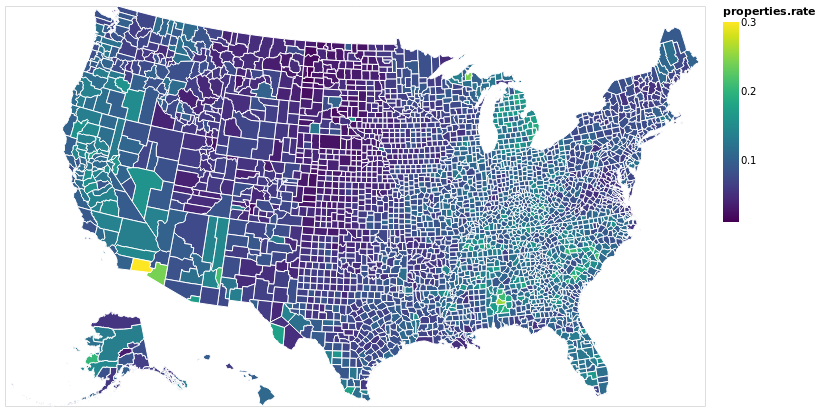

In [23]:
# parse variable `features` from json_features to `alt.Data`
data_geo = alt.Data(values=json_features['features'])

# plot map, where variables ares nested within `properties`, 
alt.Chart(data_geo).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    projection={'type': 'albersUsa'},
    width=700,
    height=400
).encode(
    color='properties.rate:Q')